In [1]:
# %%time
## Just an easy way to load utility functions
dataset_name = "W19_only"
df_list = []

%matplotlib inline 
%run f2f_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

# %run f2f_utility.py

BES_df_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_df_list.pickle", "rb" ) )
# f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised.zip", compression='zip')
BES_label_list = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\BES_label_list.pickle", "rb" ) )
demo_var_dict = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\demo_var_dict.pickle", "rb" ) )
var_type_dict_nonans = pickle.load( open( "E:\\BES_analysis_data\\Face_to_face\\var_type_dict_nonans.pickle", "rb" ) )

f2f_harmonised = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\f2f_harmonised_temp.zip", compression='zip')


generic_cols = f2f_harmonised.columns
list_of_scale_harm_vars = ["Age","year_past_min_sch_leave_age","in_school_past_min_age"]



## BUGS

BES_label_list["1959"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1964"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1966"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'
BES_label_list["1970"]["v1236"] = 'LOCAL ELECTION VOTE 1963(2nd)'

BES_label_list["2015"]['edlevel'] = 'Education level (summary)'



Toggle code

2023-05-26 01:01:51,318 WARNING: panel.io.resources - Mimetype declaration for .js files was set to 'text/plain'. This will interefere with serving JS modules. Ensure your system does not override the mimetype declaration and/or contact your system administrator. 


In [2]:
weights = pd.read_pickle("E:\\BES_analysis_data\\Face_to_face\\weights.zip", compression='zip')
f2f_harmonised["wt"] = weights["wt_vote"]

In [ ]:
## easiest breakdown - drop non-voting, just look at bloc vs bloc

In [8]:
search(f2f_harmonised,"bloc|housing")

housing_det      51587
housing          51587
bloc             52198
bloc_complete    52132
dtype: int64

In [6]:
f2f_harmonised["bloc_complete"].value_counts(dropna=False)

Left-Lib      24460
Right-Auth    17675
Neither        9997
NaN             599
Name: bloc_complete, dtype: int64

In [17]:
mask = f2f_harmonised["bloc_complete"].isin(["Left-Lib","Right-Auth"])
f2f_harmonised["auth_right_vote"] = f2f_harmonised["bloc_complete"]=="Right-Auth"
pd.get_dummies(f2f_harmonised["housing_det"][mask]).groupby(f2f_harmonised["dataset"][mask]).corrwith(f2f_harmonised["auth_right_vote"][mask])

,MORT,OWN,OWN-MORT,RENT-ALL,RENT-HA,RENT-LA,RENT-PR
dataset,,,,,,,
1959,NaN,NaN,0.067672,NaN,NaN,-0.060479,-0.016846
1964,NaN,NaN,0.064108,NaN,NaN,-0.060381,-0.014639
1966,NaN,NaN,0.066733,NaN,NaN,-0.059364,-0.016523
1970,NaN,NaN,0.050155,NaN,NaN,-0.058856,-0.000557
1974_feb,0.015360,0.016330,NaN,NaN,NaN,-0.021718,-0.010495
1974_oct,0.018641,0.017384,NaN,NaN,NaN,-0.033603,-0.001142
1979,0.005803,0.028094,NaN,NaN,NaN,-0.025632,-0.002963
1983,NaN,NaN,0.031815,NaN,-0.020021,-0.027697,-0.006229
1987,NaN,NaN,0.024745,NaN,-0.012747,-0.020557,-0.012254


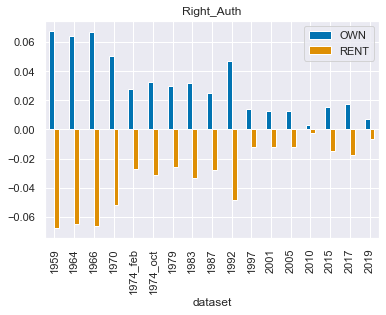

In [53]:
mask = f2f_harmonised["bloc_complete"].isin(["Left-Lib","Right-Auth"])
f2f_harmonised["auth_right_vote"] = f2f_harmonised["bloc_complete"]=="Right-Auth"
df = pd.get_dummies(f2f_harmonised["housing"][mask]).groupby(f2f_harmonised["dataset"][mask]).corrwith(f2f_harmonised["auth_right_vote"][mask])
df.plot(kind='bar',title="Right_Auth");

In [49]:
def party_by_housing(vote):
    f2f_harmonised[vote] = f2f_harmonised["vote_complete"]==vote
    df = pd.get_dummies(f2f_harmonised["housing"]).groupby(f2f_harmonised["dataset"]).corrwith(f2f_harmonised[vote])
    df.plot(kind='bar',title=vote);

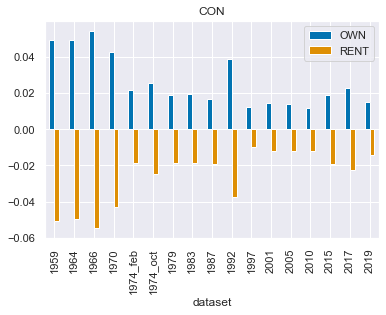

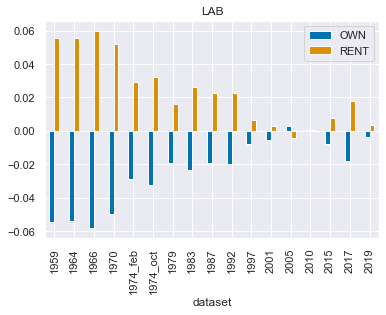

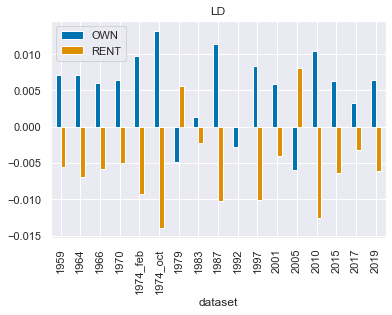

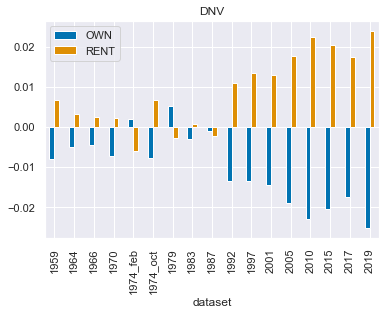

In [51]:
party_by_housing("CON"),party_by_housing("LAB"),party_by_housing("LD"),party_by_housing("DNV");

In [815]:
f2f_harmonised["vote_complete_simple"].value_counts()

CON      17150
LAB      16387
DNV       9997
LD        6381
SNP       1147
DK         599
REFUK      525
GP         281
PC         264
Name: vote_complete_simple, dtype: int64

,inc_det,inc_norm,inc_norm_wt
inc_det,1.000000,0.928029,0.860604
inc_norm,0.928029,1.000000,0.945883
inc_norm_wt,0.860604,0.945883,1.000000


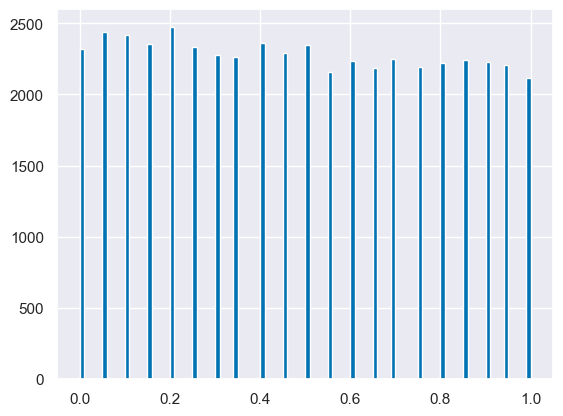

In [4]:
wt_means = f2f_harmonised.groupby("dataset")["wt"].mean().to_dict()
f2f_harmonised["wt_norm"] = f2f_harmonised.apply(lambda x: x["wt"]/wt_means[x["dataset"]] , axis=1 )

f2f_harmonised["AuthRight"] = f2f_harmonised["bloc_complete"]=="Right-Auth"
f2f_harmonised["LibLeft"] = f2f_harmonised["bloc_complete"]=="Left-Lib"

f2f_harmonised["CON"] = f2f_harmonised["vote_complete_simple"]=="CON"
f2f_harmonised["LAB"] = f2f_harmonised["vote_complete_simple"]=="LAB"
f2f_harmonised["DNV"] = f2f_harmonised["vote_complete_simple"]=="DNV"
f2f_harmonised["LD"]  = f2f_harmonised["vote_complete_simple"]=="LD"
f2f_harmonised["REFUK"]  = f2f_harmonised["vote_complete_simple"]=="REFUK"
f2f_harmonised["SNP"]  = f2f_harmonised["vote_complete_simple"]=="SNP"
f2f_harmonised["GP"]  = f2f_harmonised["vote_complete_simple"]=="GP"
f2f_harmonised["DK"]  = f2f_harmonised["vote_complete_simple"]=="DK"
f2f_harmonised["PC"]  = f2f_harmonised["vote_complete_simple"]=="PC"
f2f_harmonised["decade"] = f2f_harmonised["age"]/10
f2f_harmonised["generation"] = f2f_harmonised["age"]/20
inc_maxes = f2f_harmonised.groupby("dataset")["inc_det"].max().to_dict()
f2f_harmonised["inc_norm"] = f2f_harmonised.apply(lambda x: x["inc_det"]/inc_maxes[x["dataset"]] , axis=1 )#.groupby(f2f_harmonised["dataset"]).hist()
## do a proper version with weighting/quantiles

f2f_harmonised["inc_norm_wt"]=np.nan
temp = (f2f_harmonised[f2f_harmonised["wt"].notnull()].groupby("dataset").apply(lambda x: weighted_qcut(x["inc_det"],x["wt"],21)).cat.codes/20)
reverse_dict = {v:k for k,v in f2f_harmonised[f2f_harmonised["wt"].notnull()].groupby("dataset").apply(lambda x: x["uid"]).to_dict().items()}
f2f_harmonised.loc[f2f_harmonised["wt"].notnull(),"inc_norm_wt"]=temp.loc[f2f_harmonised["uid"][f2f_harmonised["wt"].notnull()].apply(lambda x: reverse_dict[x])].values
# weighted_qcut

f2f_harmonised["inc(quartile)"] = f2f_harmonised["inc_norm_wt"]*4
f2f_harmonised["inc_norm_wt"].hist(bins=100)
f2f_harmonised[["inc_det","inc_norm","inc_norm_wt"]].corr()


In [660]:
f2f_harmonised.groupby("dataset")["wt_norm"].mean()

dataset
1959        1.0
1964        1.0
1966        1.0
1970        1.0
1974_feb    1.0
1974_oct    1.0
1979        1.0
1983        1.0
1987        1.0
1992        1.0
1997        1.0
2001        1.0
2005        1.0
2010        1.0
2015        1.0
2017        1.0
2019        1.0
Name: wt_norm, dtype: float64

In [712]:
f2f_harmonised.groupby("dataset")["age_left_education_3"].apply(lambda x: x.isnull().sum())

dataset
1959         38
1964         38
1966         38
1970         38
1974_feb     16
1974_oct     21
1979          2
1983          7
1987         12
1992         15
1997         17
2001          6
2005          5
2010          4
2015         94
2017         38
2019        178
Name: age_left_education_3, dtype: int64

In [723]:
f2f_harmonised.groupby("dataset")["age"].std()

dataset
1959        17.009940
1964        17.009940
1966        16.967905
1970        16.973223
1974_feb    17.453201
1974_oct    17.589125
1979        17.188263
1983        17.798715
1987        17.799558
1992        17.529583
1997        18.060027
2001        18.033689
2005        17.783624
2010        17.858522
2015        18.062168
2017        18.447279
2019        17.846707
Name: age, dtype: float64

In [713]:
f2f_harmonised.groupby("dataset")["age_left_education_3"].value_counts()

dataset  age_left_education_3
1959     15 or younger           2271
         16                       307
         18                       263
         19 or older               43
1964     15 or younger           2271
                                 ... 
2017     16                       311
2019     19 or older             1672
         15 or younger            964
         18                       681
         16                       451
Name: age_left_education_3, Length: 68, dtype: int64

In [5]:
ge_to_date_dict = {'1959':"8/10/1959", '1964':"15/10/1964", '1966':"31/3/1966", '1970':"18/6/1970", '1974_feb':"28/2/1974",
 '1974_oct':"10/10/1974", '1979':"5/3/1979", '1983':"9/6/1983",'1987':"11/6/1987", '1992':"9/4/1992",
 '1997':"1/5/1997", '2001':"7/6/2001", '2005':"5/5/2005", '2010':"6/5/2010", '2015':"7/5/2015",
 '2017':"8/6/2017", '2019':"12/12/2019"}

def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
#     raise Exception
    data.plot(x=x, y=y, yerr=yerr,xerr=None, kind="line", ax=ax, **kwargs)

def OLS_party_housing(variance_scaled = False, regularised=False, regression_type="OLS",const=True,
                     cols = ['age', 'inc_det', 'gender_complete', 'housing'],drop_first=True,dummy_na=False,
                     dummied_cols = None,
                     mask = f2f_harmonised["bloc_complete"].isin(["Left-Lib","Right-Auth"]),
                     target = "auth_right_vote",
                     error_bars=False, hide_const=False,add_actual=False,
                     ax=None,single_legend=False,eyeline=True,alpha_const_actual=True):

    import statsmodels.api as sm
    from sklearn.preprocessing import StandardScaler
    from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
    wt_var = "wt_norm"
    
    
#     mask = 
    if regression_type=="Weighted_OLS":
        mask = mask & f2f_harmonised[wt_var].notnull()
    if dummied_cols == None:
        dummied_cols = list(pd.get_dummies(f2f_harmonised[cols][mask],drop_first=drop_first,dummy_na=dummy_na).columns)

    if const:
        dummied_cols = ["const"]+dummied_cols
    if add_actual:
        dummied_cols = ["actual"]+dummied_cols
    results_df = pd.DataFrame(columns = dummied_cols)        
    # add error_bar columns
    if error_bars:
        dummied_errs = [x+'_err' for x in dummied_cols]
        results_df[dummied_errs]=np.nan
        
    scaler = StandardScaler()

    for ge in f2f_harmonised["dataset"].unique():
    # ge = "1979"
        df = f2f_harmonised[mask][f2f_harmonised["dataset"][mask]==ge][cols+[target]]
        if regression_type == "Weighted_OLS":
            sample_weight = f2f_harmonised[mask][f2f_harmonised["dataset"][mask]==ge][wt_var]
#             raise Exception
        X = pd.get_dummies(df.drop([target],axis=1),drop_first=drop_first,dummy_na=dummy_na)
        X = X[intersection(X.columns, dummied_cols)]
        
        if variance_scaled:
            X = pd.DataFrame(scaler.fit_transform(X,sample_weight=sample_weight),columns=X.columns,index=X.index)
        if const:
            X = sm.add_constant(X)

        Y = df[target]
        if regression_type == "OLS":
            model = sm.OLS(Y,X)
        elif regression_type == "Logit":
            model = sm.Logit(Y,X)
        elif regression_type == "Probit":
            model = sm.Probit(Y,X)
        elif regression_type == "Weighted_OLS":
            if regularised:
                model = ElasticNet(fit_intercept=False,alpha=0.0)
#                 LinearRegression()
            else:
                model = LinearRegression(fit_intercept=False)
                
            model.fit(X, Y, sample_weight=sample_weight)
            

        # results.params
        if regression_type == "Weighted_OLS":
            results_df.loc[ge,X.columns] = model.coef_
        else:
            if regularised:        
                results = model.fit_regularized()
            else:
                results = model.fit()            
            results_df.loc[ge,X.columns] = results.params.values
            
        # error bars
        # dodgy, grabbing only
        if error_bars:
            if regression_type == "Weighted_OLS":
                model = sm.OLS(Y,X)
            # otherwise use sm model used prior
            results = model.fit()
            errors = results.conf_int()
            results_df.loc[ge,[x+"_err" for x in X.columns]] = (results_df.loc[ge,X.columns]-errors[0]).values
#             raise Exception
        
        if add_actual:
            if regression_type == "Weighted_OLS":
                results_df.loc[ge,"actual"] = sum(Y.loc[X.dropna().index]*sample_weight.loc[X.dropna().index])/sum(sample_weight.loc[X.dropna().index])
#                 (Y.loc[X.dropna().index]*sample_weight.loc[X.dropna().index]).mean()
#                 results_df.loc[ge,"actual"] = Y.mean()
#                 raise Exception
            else:
                results_df.loc[ge,"actual"] = Y.loc[X.dropna().index].mean()

    results_df = results_df.sort_index()

#     else:
#         title = title+"_unscaled"        
#     results_df.plot(kind='line',title=title)  

    if ax is None:
        plt.figure(figsize=(12,6));
        ax=plt.gca()
        
#     if single_legend:
#         legend=False
#     else:
#         legend='auto'
    x_label = "UK GE Date"
    y_label = "Impact on Probability"
    hue_label = "Factor"
    title = 'Probability of Voting: '+target
#     if variance_scaled:
#         title = title+"_scaled"
# #     else:
# #         title = title+"_unscaled"
#     if regularised:
#         title = title+"_regularised"    
    hue_name_replace_dict = {"inc_norm_wt":"income(decile)",
                         "generation":"age(generation)",
                         "gender_complete":"gender(female)",
                         "housing_OWN":"tenure(OWN&MORT)","housing_RENT":"tenure(RENT)",
                         "housing_det_OWN":"tenure(OWN)","housing_det_MORT":"tenure(MORT)","housing_det_OWN-MORT":"tenure(OWN&MORT)",
                         "housing_det_RENT-LA":"tenure(RENT-LA)","housing_det_RENT-PR":"tenure(RENT-PR)","housing_det_RENT-HA":"tenure(RENT-HA)","housing_det_RENT-ALL":"tenure(RENT)",
                         "age_left_education_3_15 or younger":"left_edu(15-)","age_left_education_3_16":"left_edu(16)",
                         "age_left_education_3_18":"left_edu(17-18)","age_left_education_3_19 or older":"left_edu(19+)",
                        }
#     sns.set(font_scale = 2)
    if error_bars:
        res_df = results_df[dummied_cols].reset_index().melt(id_vars='index')
        res_df["index"] = res_df["index"].replace(ge_to_date_dict).apply(lambda x: pd.to_datetime(x))
        res_df.columns = [x_label,hue_label,y_label]
        res_df[y_label] = res_df[y_label.astype('float')]

        err_df = results_df[dummied_errs].reset_index().melt(id_vars='index')
        err_df["index"] = err_df["index"].replace(ge_to_date_dict).apply(lambda x: pd.to_datetime(x))
        err_df.columns = [x_label,hue_label,y_label]
        err_df[y_label] = err_df[y_label].astype('float')
        res_df["yerr"] = err_df[y_label]
        if hide_const:
            res_df = res_df.replace("const",np.nan).dropna()
#         res_df
        res_df=res_df.replace(hue_name_replace_dict)
        g = sns.FacetGrid(res_df, hue=hue_label,height=6,aspect=1.5)
        g.map_dataframe(errplot, x_label, y_label, "yerr",ax=ax)# test ax!
        g.add_legend()    
    
    else:
        

        res_df = results_df.reset_index().melt(id_vars='index')
        res_df["index"] = res_df["index"].replace(ge_to_date_dict).apply(lambda x: pd.to_datetime(x))
        res_df.columns = [x_label,hue_label,y_label]
        res_df[y_label] = res_df[y_label].astype('float')
        if hide_const:
            res_df = res_df.replace("const",np.nan).dropna()
        res_df=res_df.replace(hue_name_replace_dict)
        sns.lineplot(data = res_df,x=x_label,y=y_label,hue=hue_label,style=hue_label,markers=True,ax=ax);
        ax.set_xlabel(x_label,fontsize=16);
        ax.set_ylabel(y_label,fontsize=22);
        ax.set_title(title,fontsize=22);
#         plt.xticks(rotation=90);   
#         plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if eyeline:
        ax.axhline(0, color ='grey', lw = 2, alpha=.2);
    if alpha_const_actual:
        if const or add_actual:
            ax.get_lines()[0].set_alpha(.5);   
        if const and add_actual:
            ax.get_lines()[1].set_alpha(.5);   

    if single_legend:
        handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        legend_data = (handles, labels)
    else:
        legend_data = None
    
    
    return res_df,legend_data

In [922]:
# f2f_harmonised.groupby("dataset")["inc_norm_wt"].std()

In [923]:
# sns.set(font_scale = 1)

In [924]:
# pd.get_dummies(f2f_harmonised[["housing","housing_det","age_left_education_3"]]).melt()["variable"].replace(hue_name_replace_dict).value_counts()

In [6]:
def plot_OLS_set(target_list, X_list, figsize=(16.5, 6),  sharey=True, regression_type="Weighted_OLS",regularised=False,
                 variance_scaled=False,drop_first=False,hide_const=False,add_actual=True,dummied_cols=None, single_legend=True):
    fig, axs = plt.subplots(ncols=len(target_list),figsize=figsize, sharey=sharey);
    ax_pos = 0
    for target in target_list:
        df,(handles, labels)=OLS_party_housing(variance_scaled=variance_scaled,drop_first=drop_first,cols = X_list,
                    target=target,mask = f2f_harmonised["vote_complete_simple"].notnull()&f2f_harmonised["wt"].notnull(),
                    regression_type=regression_type, regularised=regularised, hide_const=hide_const,add_actual=add_actual,
                    dummied_cols=dummied_cols,single_legend=single_legend,
                    ax=axs[ax_pos])
        ax_pos=ax_pos+1
    if single_legend:
#         handles, labels = axs[0].get_legend_handles_labels()
        fig.legend(handles, labels, 
                   loc='upper center',
                   bbox_to_anchor=(0.5, 0.05), bbox_transform = plt.gcf().transFigure,
                   fancybox=False, shadow=False, ncol=5);
#         raise Exception
#     return (handles, labels)

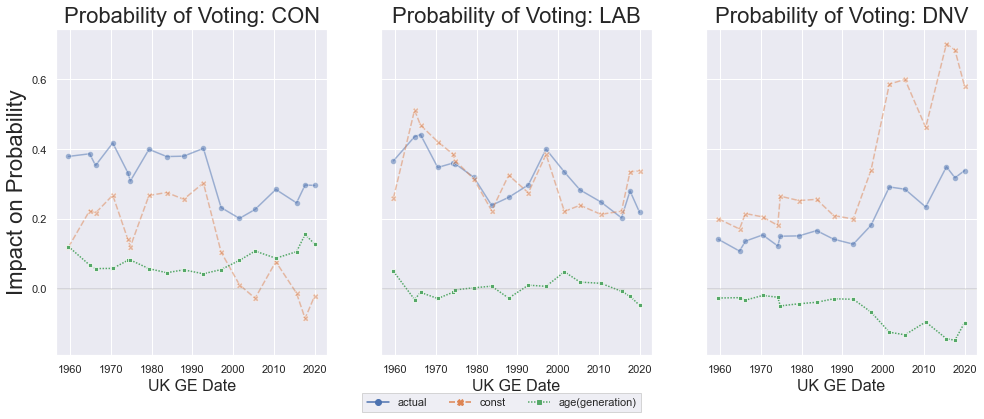

In [929]:
plot_OLS_set(["CON","LAB","DNV"], ["generation"], figsize=(16.5, 6),  sharey=True)

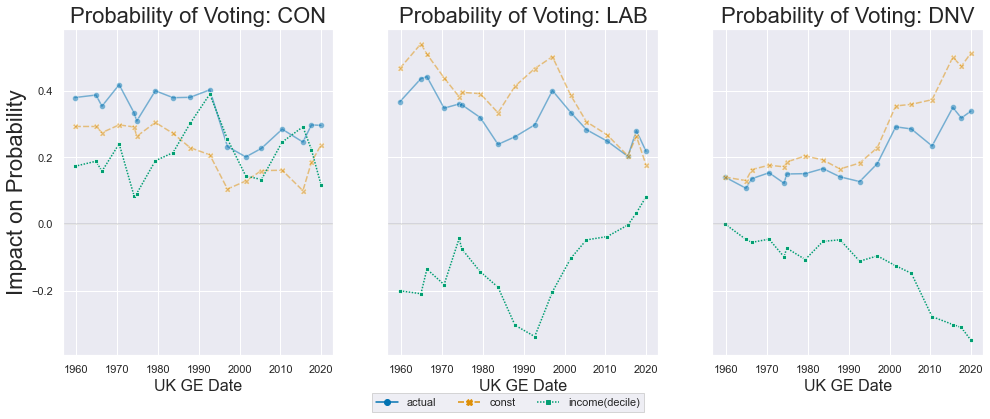

In [1136]:
plot_OLS_set(["CON","LAB","DNV"], ["inc_norm_wt"], figsize=(16.5, 6),  sharey=True)

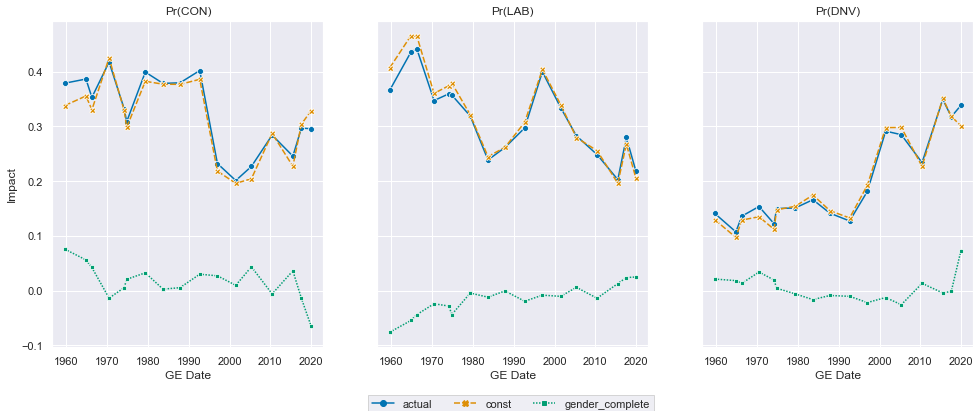

In [775]:
plot_OLS_set(["CON","LAB","DNV"], ["gender_complete"], figsize=(16.5, 6),  sharey=True)

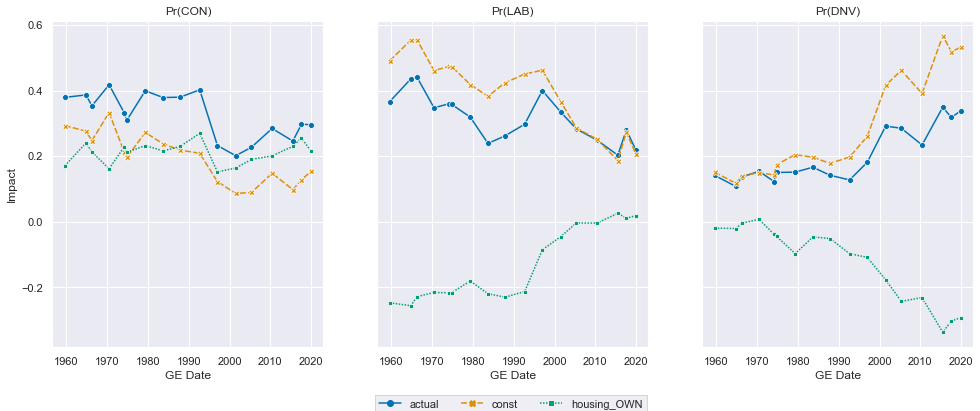

In [786]:
plot_OLS_set(["CON","LAB","DNV"], ["housing"], figsize=(16.5, 6),  sharey=True,drop_first=False,dummied_cols=["housing_OWN"])

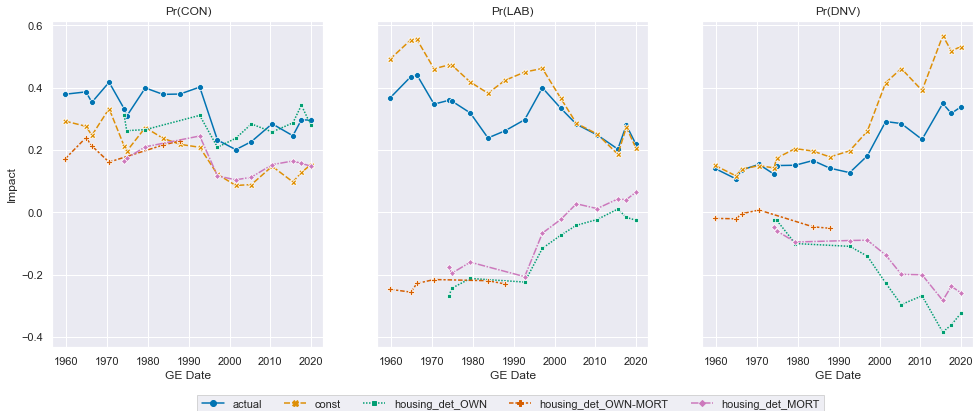

In [793]:
plot_OLS_set(["CON","LAB","DNV"], ["housing_det"], figsize=(16.5, 6),  sharey=True,drop_first=False,
             dummied_cols=["housing_det_OWN","housing_det_OWN-MORT","housing_det_MORT"])

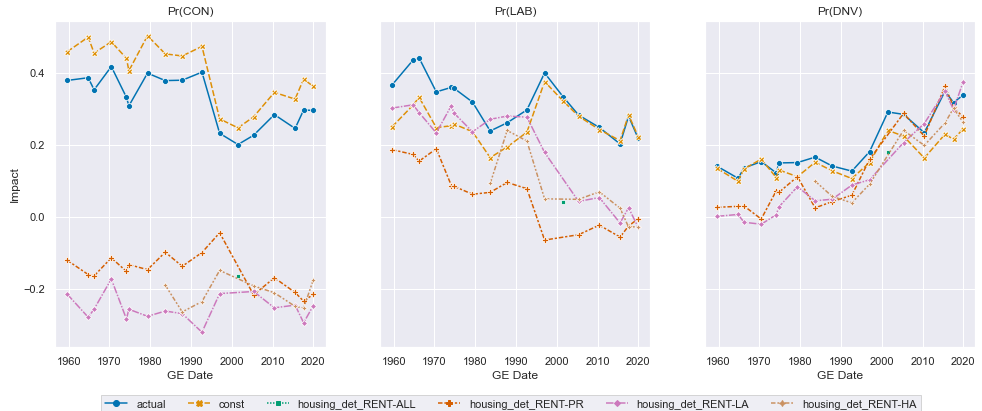

In [792]:
plot_OLS_set(["CON","LAB","DNV"], ["housing_det"], figsize=(16.5, 6),  sharey=True,drop_first=False,
             dummied_cols=["housing_det_RENT-ALL","housing_det_RENT-PR","housing_det_RENT-LA","housing_det_RENT-HA"])

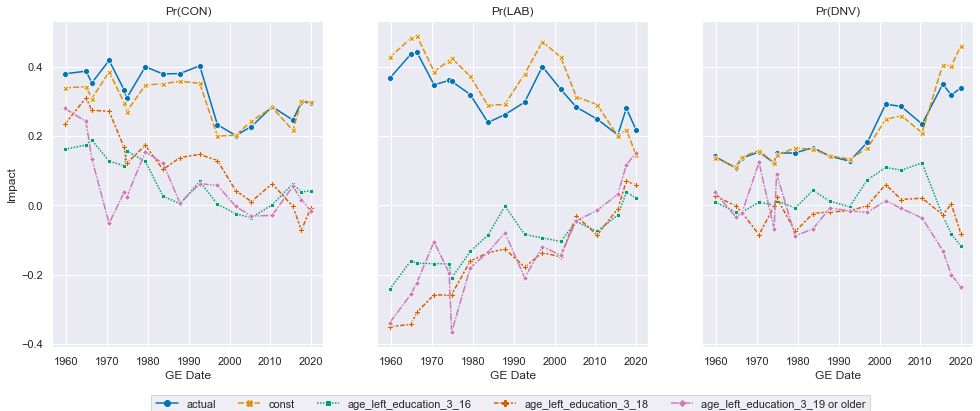

In [797]:
plot_OLS_set(["CON","LAB","DNV"], ["age_left_education_3"], figsize=(16.5, 6),  sharey=True, drop_first=True)

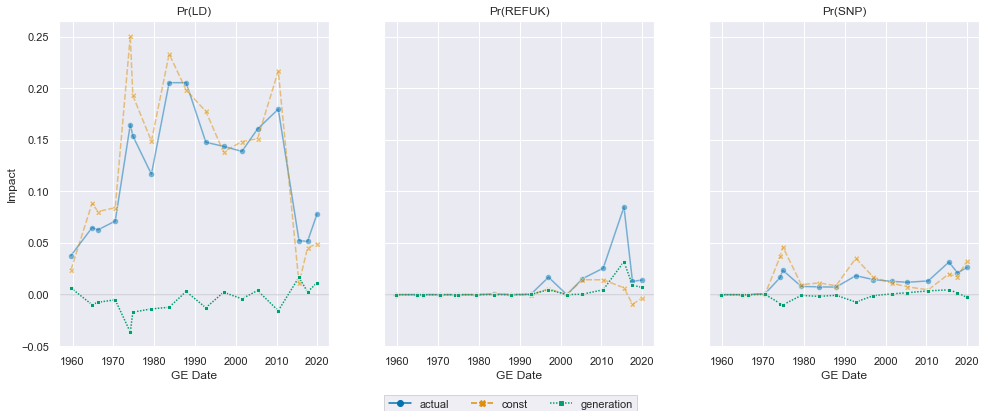

In [819]:
plot_OLS_set(["LD","REFUK","SNP"], ["generation"], figsize=(16.5, 6),  sharey=True, drop_first=True)

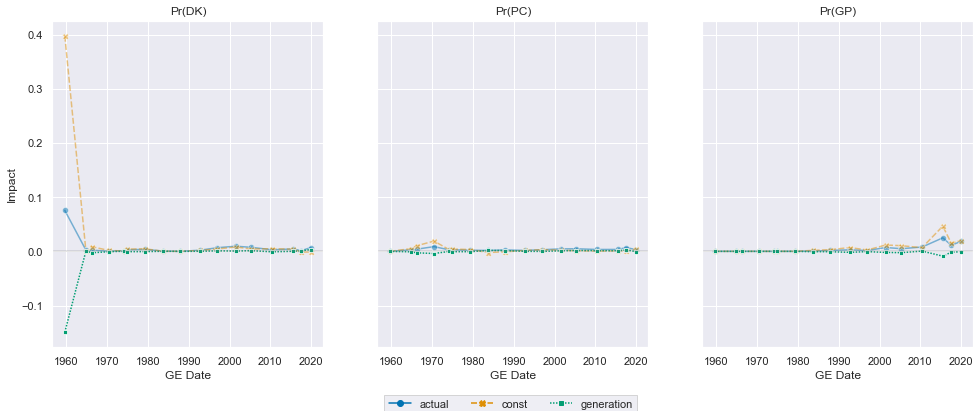

In [820]:
plot_OLS_set(["DK","PC","GP"], ["generation"], figsize=(16.5, 6),  sharey=True, drop_first=True)

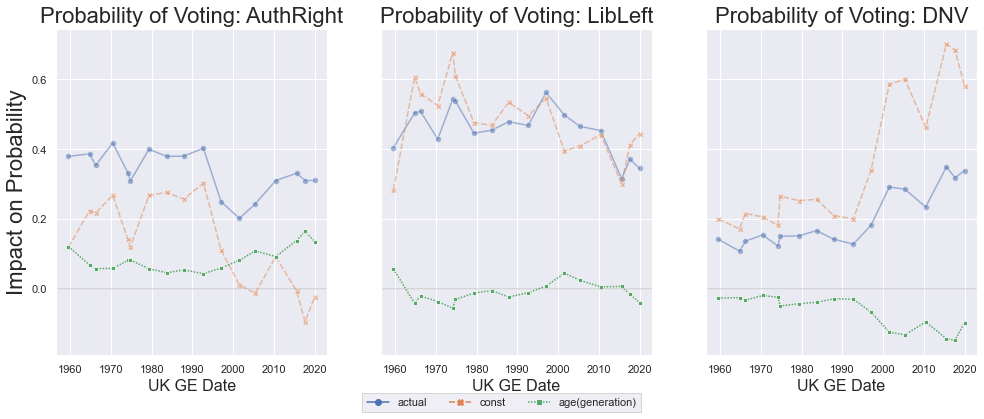

In [930]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["generation"], figsize=(16.5, 6),  sharey=True, drop_first=True)

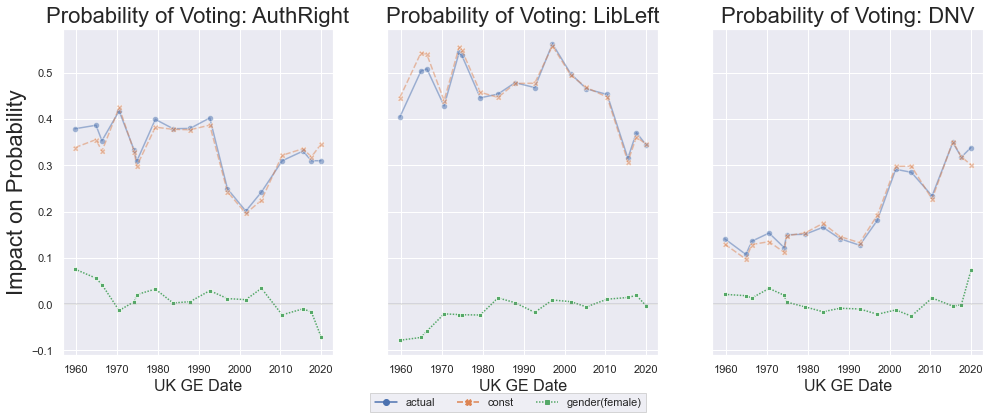

In [932]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["gender_complete"], figsize=(16.5, 6),  sharey=True, drop_first=True)

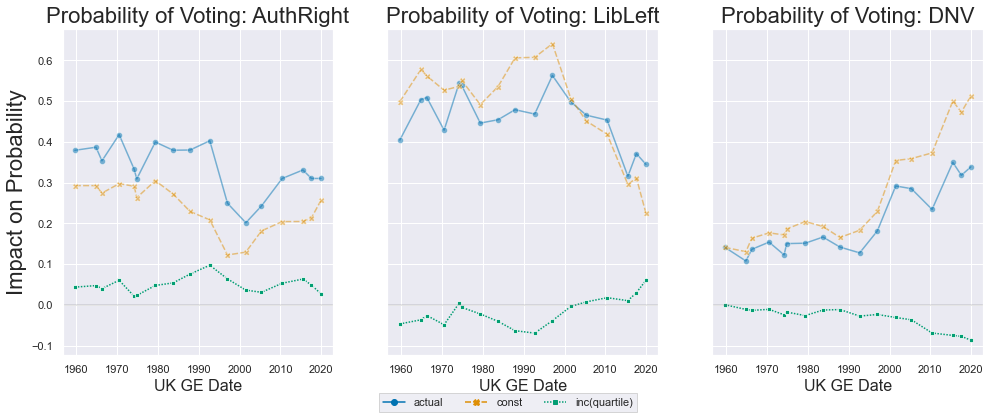

In [1137]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["inc(quartile)"], figsize=(16.5, 6),  sharey=True, drop_first=True)

In [1139]:
# plot_OLS_set(["LAB","LD"], ["inc(quartile)"], figsize=(16.5, 6),  sharey=True, drop_first=True)

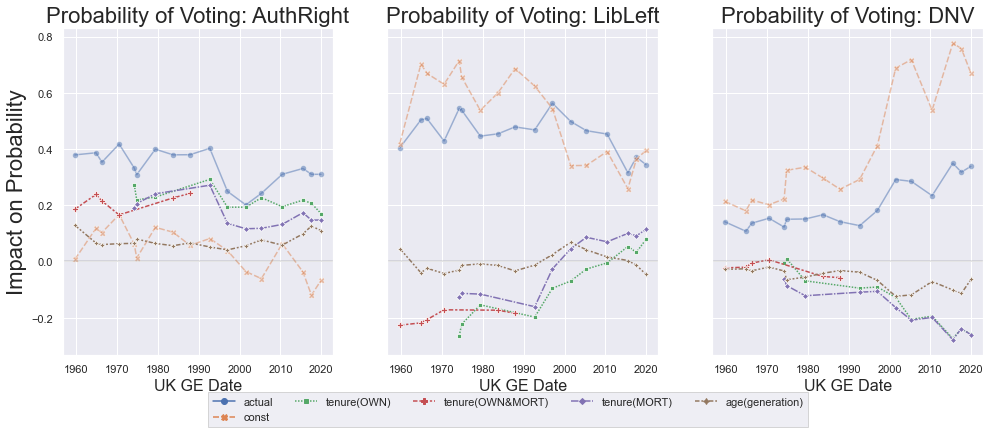

In [934]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["housing_det","generation"],dummied_cols=["housing_det_OWN","housing_det_OWN-MORT","housing_det_MORT","generation"], figsize=(16.5, 6),  sharey=True, drop_first=False)

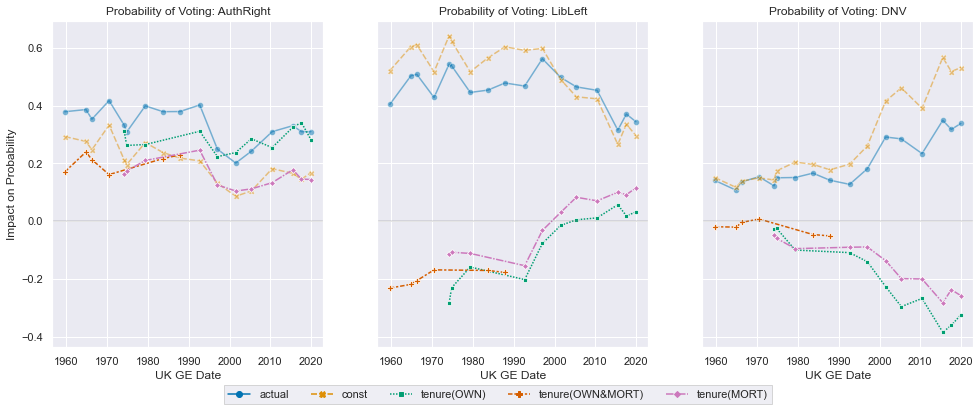

In [882]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["housing_det"],dummied_cols=["housing_det_OWN","housing_det_OWN-MORT","housing_det_MORT"], figsize=(16.5, 6),  sharey=True, drop_first=False)

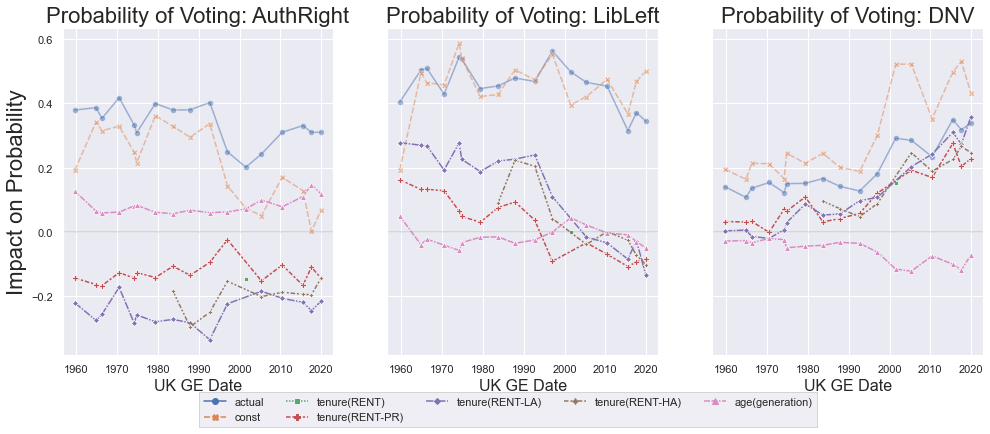

In [935]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["housing_det","generation"],
             dummied_cols=["housing_det_RENT-ALL","housing_det_RENT-PR","housing_det_RENT-LA","housing_det_RENT-HA","generation"], figsize=(16.5, 6),  sharey=True, drop_first=False)

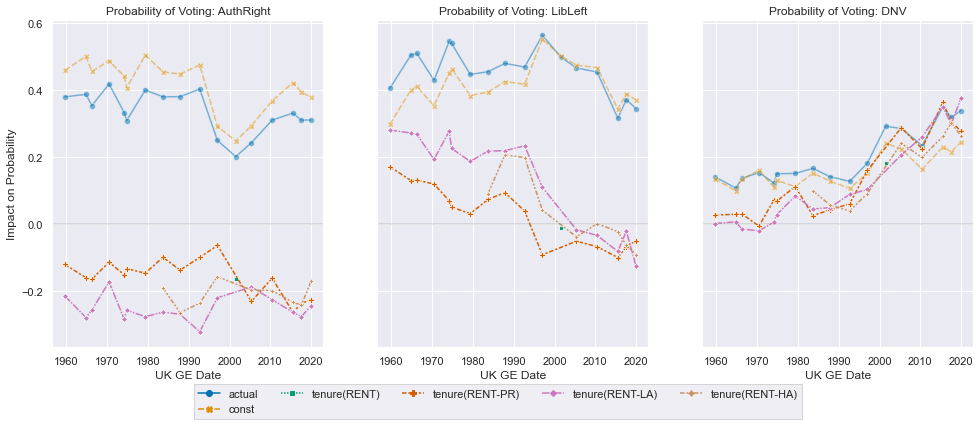

In [884]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["housing_det"],dummied_cols=["housing_det_RENT-ALL","housing_det_RENT-PR","housing_det_RENT-LA","housing_det_RENT-HA"], figsize=(16.5, 6),  sharey=True, drop_first=False)

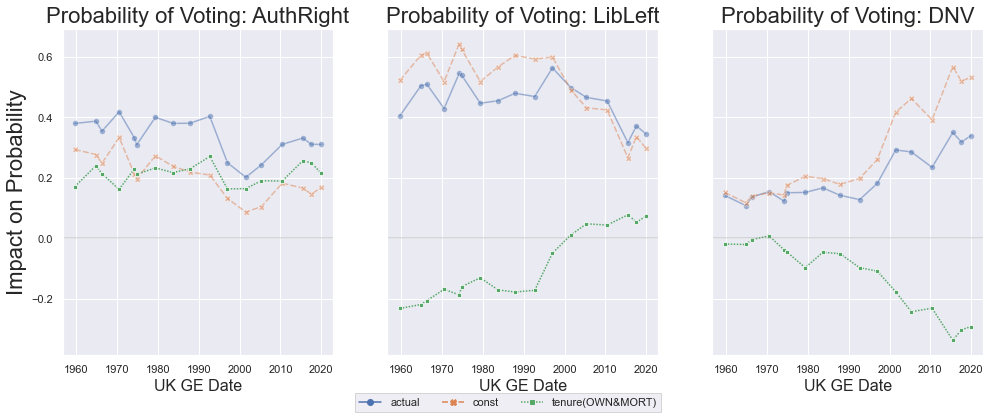

In [933]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["housing"],
             dummied_cols=["housing_OWN"],drop_first=False, figsize=(16.5, 6),  sharey=True, )

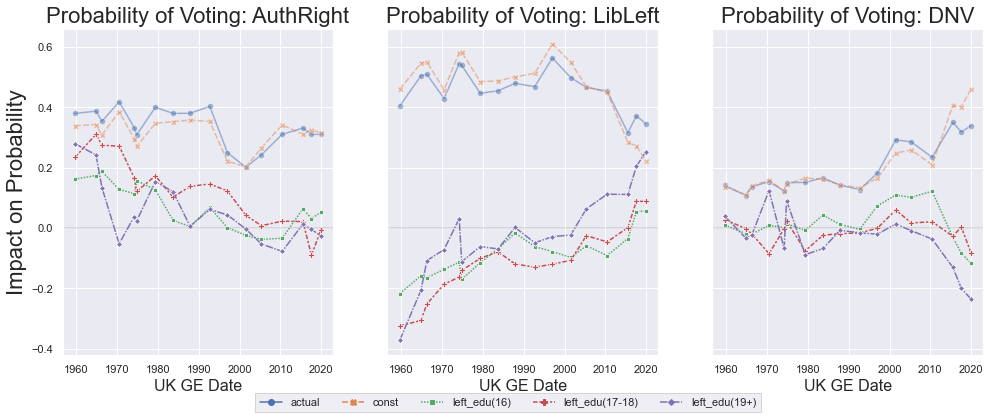

In [937]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["age_left_education_3"],drop_first=True, figsize=(16.5, 6),  sharey=True, )

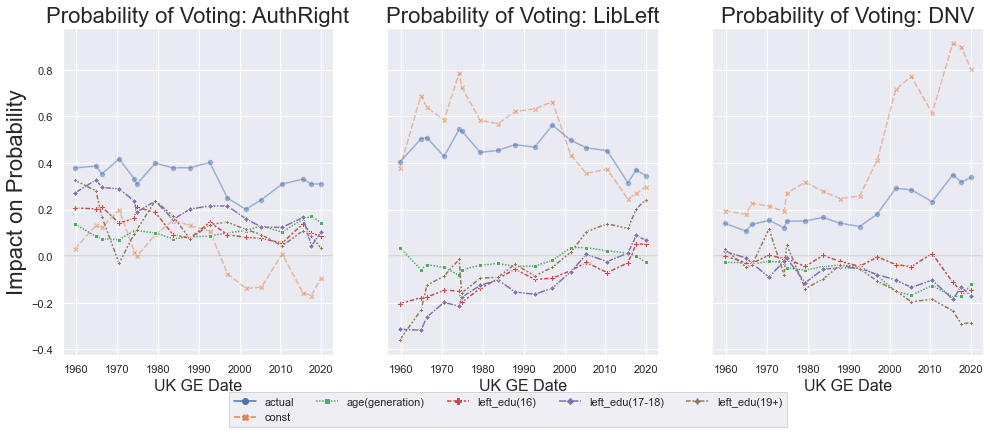

In [941]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["age_left_education_3","generation"],drop_first=True, figsize=(16.5, 6),  sharey=True, )

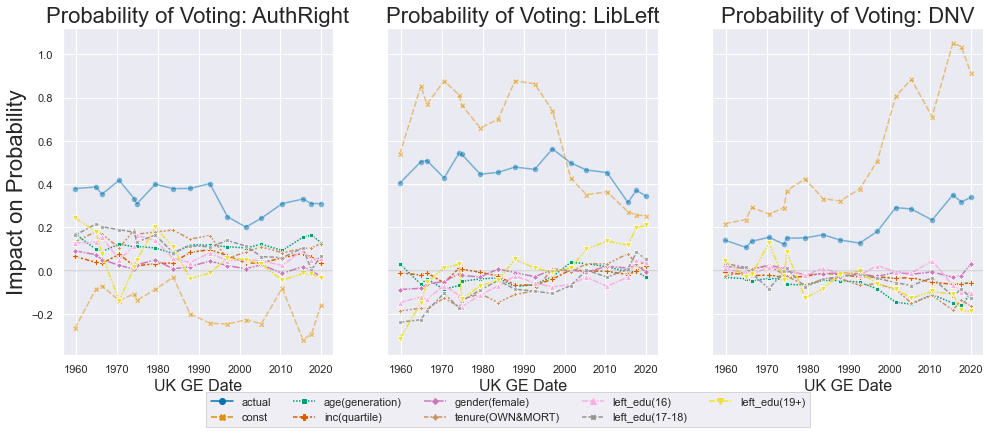

In [1140]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["generation","inc(quartile)","gender_complete","housing","age_left_education_3"],
             dummied_cols=["generation","inc(quartile)","gender_complete","housing_OWN","age_left_education_3_16","age_left_education_3_18",
                          "age_left_education_3_19 or older"],
             drop_first=False, figsize=(16.5, 6),  sharey=True, )

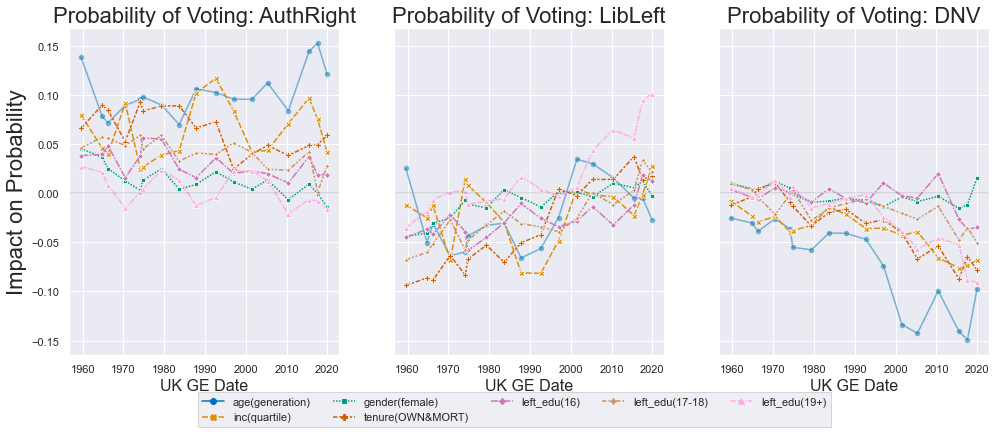

In [1141]:
plot_OLS_set(["AuthRight","LibLeft","DNV"], ["generation","inc(quartile)","gender_complete","housing","age_left_education_3"],
             dummied_cols=["generation","inc(quartile)","gender_complete","housing_OWN","age_left_education_3_16","age_left_education_3_18",
                          "age_left_education_3_19 or older"],
             drop_first=False, figsize=(16.5, 6),  sharey=True, variance_scaled=True,hide_const=True,add_actual=False )

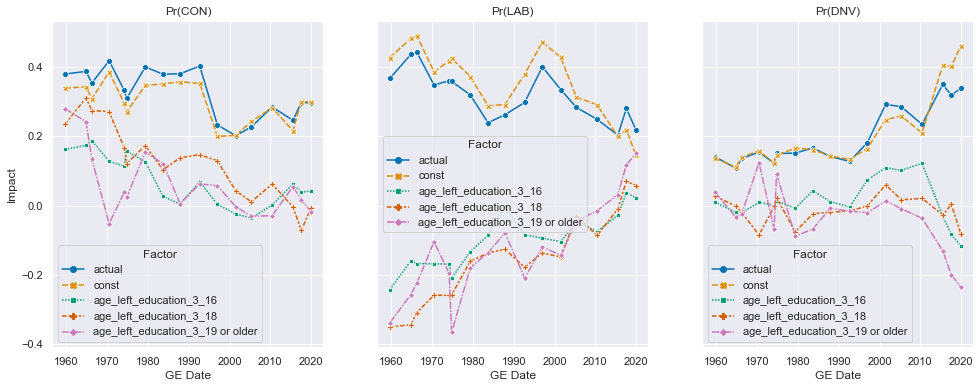

In [716]:
plot_OLS_set(["CON","LAB","DNV"], ["age_left_education_3"], figsize=(16.5, 6),  sharey=True,regularised=False,drop_first=True)

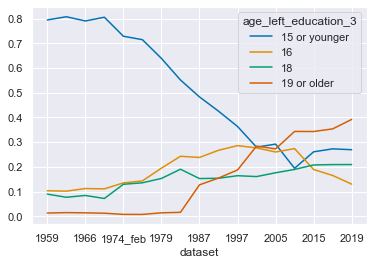

In [714]:
pd.crosstab(f2f_harmonised["age_left_education_3"],f2f_harmonised["dataset"],values=f2f_harmonised["wt"],aggfunc=sum,normalize='columns').T.plot(kind='line')

In [666]:
f2f_harmonised.groupby("dataset")[["decade","inc_norm_wt","gender_complete","housing","age_left_education_3","vote_complete_simple","wt"]].apply(lambda x: x.isnull().sum())

,decade,inc_norm_wt,gender_complete,housing,age_left_education_3,vote_complete_simple,wt
dataset,,,,,,,
1959,0,0,0,97,38,0,0
1964,0,1153,0,103,38,0,1153
1966,0,1048,0,103,38,0,1048
1970,0,1567,0,109,38,0,1567
1974_feb,0,0,0,56,16,0,0
1974_oct,0,0,0,16,21,0,0
1979,0,0,0,44,2,0,0
1983,0,0,0,113,7,0,0
1987,0,0,0,76,12,0,0


In [949]:
mask = f2f_harmonised["dataset"]=="2017"

pd.crosstab(f2f_harmonised["gender_complete"][mask],f2f_harmonised["vote"][mask],
            values=f2f_harmonised["wt"][mask],aggfunc=sum,normalize='columns')#.T.plot(kind='line')

vote,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
gender_complete,,,,,,,,,,
0.0,0.501143,0.0,0.490276,0.547708,0.467937,0.553743,0.71669,0.334795,0.408948,0.54306
1.0,0.498857,0.0,0.509724,0.452292,0.532063,0.446257,0.28331,0.665205,0.591052,0.45694


In [953]:
mask = f2f_harmonised["dataset"]=="2017"

pd.crosstab(f2f_harmonised["gender_complete"][mask],f2f_harmonised["vote"][mask],
#             values=f2f_harmonised["wt"][mask],aggfunc=sum,normalize='columns'
           )#.T.plot(kind='line')

vote,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
gender_complete,,,,,,,,,,
0.0,323,34,214,16,303,63,2,6,19,21
1.0,348,41,248,15,422,54,2,17,30,16


In [947]:
mask = f2f_harmonised["dataset"]=="2019"

pd.crosstab(f2f_harmonised["gender_complete"][mask],f2f_harmonised["vote"][mask],
            values=f2f_harmonised["wt"][mask],aggfunc=sum,normalize='columns')#.T.plot(kind='line')

vote,BXP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
gender_complete,,,,,,,,,,,
0.0,0.622409,0.544288,0.0,0.436377,0.470185,0.461543,0.538225,0.464503,0.281815,0.655913,0.0
1.0,0.377591,0.455712,0.0,0.563623,0.529815,0.538457,0.461775,0.535497,0.718185,0.344087,1.0


In [948]:
mask = f2f_harmonised["dataset"]=="2019"

pd.crosstab(f2f_harmonised["gender_complete"][mask],f2f_harmonised["vote"][mask],
#             values=f2f_harmonised["wt"][mask],aggfunc=sum,normalize='columns'
           )#.T.plot(kind='line')

vote,BXP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,UKIP
gender_complete,,,,,,,,,,,
0.0,23,692,86,315,44,380,186,9,3,72,0
1.0,20,656,153,460,54,515,198,12,13,53,2


In [966]:
df = f2f_harmonised[f2f_harmonised["dataset"]=="2019"]
mask = (BES_df_list["2019"]["u05"]=="Conservative")
pd.crosstab(df["gender_complete"][mask],df["vote"][mask],
            values=df["wt"][mask],aggfunc=sum,normalize='columns'
           )

vote,BXP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP
gender_complete,,,,,,,,,,
0.0,0.434065,0.543611,0.0,0.503884,0.268226,0.23359,0.521578,0.589942,0.0,0.784113
1.0,0.565935,0.456389,0.0,0.496116,0.731774,0.76641,0.478422,0.410058,0.0,0.215887


In [976]:
## voted CON in 2017, voted ? in 2019
# +6 men in 2017 -> +36 in 2019, of which +23 -> LAB, +4 LD, +4 GP, 

df = f2f_harmonised[f2f_harmonised["dataset"]=="2019"]
mask = (BES_df_list["2019"]["u05"]=="Conservative")
pd.crosstab(df["gender_complete"][mask],df["vote"][mask],
#             values=f2f_harmonised["wt"][mask],aggfunc=sum,normalize='columns'
            margins='all',
           )#.T.plot(kind='line')

vote,BXP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,All
gender_complete,,,,,,,,,,,
0.0,2,420,3,51,2,10,37,3,0,2,530
1.0,4,384,7,55,6,33,41,4,1,1,536
All,6,804,10,106,8,43,78,7,1,3,1066


In [975]:
## voted CON in 2019, voted ? in 2017
# gap of 58, 36 from Con17->Con19, +22 from UKIP, +9 DNV

df = f2f_harmonised[f2f_harmonised["dataset"]=="2019"]
mask = df["vote"]=="CON"
#(BES_df_list["2019"]["u05"]=="Conservative")
pd.crosstab(df["gender_complete"][mask],BES_df_list["2019"]["u05"][mask],
#             values=f2f_harmonised["wt"][mask],aggfunc=sum,normalize='columns'
           margins='all')

u05,Prefer not to say/Refuse,Don't know,Did not vote,Labour,Conservative,Liberal Democrat,Scottish National Party,Plaid Cymru,Green Party,United Kingdom Independence Party (UKIP),British National Party (BNP),Other,Not eligible/too young to vote,Spoilt ballot paper,Brexit,All
gender_complete,,,,,,,,,,,,,,,,
0.0,3,13,38,47,420,15,2,0,3,36,1,1,9,1,2,591
1.0,1,21,29,45,384,24,0,1,3,14,2,1,6,1,1,533
All,4,34,67,92,804,39,2,1,6,50,3,2,15,2,3,1124


In [977]:
# DNV 2017 -> ?
# men differentially leaving to vote
# 2017 female skewed 48, 2019 female skewed 63
# more men split for CON and LAB

df = f2f_harmonised[f2f_harmonised["dataset"]=="2019"]
mask = (BES_df_list["2019"]["u05"]=="Did not vote")
pd.crosstab(df["gender_complete"][mask],df["vote"][mask],
#             values=f2f_harmonised["wt"][mask],aggfunc=sum,normalize='columns'
            margins='all',
           )#.T.plot(kind='line')

vote,BXP,CON,DK,DNV,GP,LAB,LD,OTH,PC,SNP,All
gender_complete,,,,,,,,,,,
0.0,2,38,7,144,5,31,7,0,0,0,234
1.0,0,29,8,207,5,22,7,1,1,2,282
All,2,67,15,351,10,53,14,1,1,2,516


In [983]:
## DNV in 2019, voted ? in 2017
# DK/pref not to say -> big swing from women

df = f2f_harmonised[f2f_harmonised["dataset"]=="2019"]
mask = df["vote"]=="DNV"
#(BES_df_list["2019"]["u05"]=="Conservative")
pd.crosstab(df["gender_complete"][mask],BES_df_list["2019"]["u05"][mask],
#             values=df["wt"][mask],aggfunc=sum,normalize='columns',
           margins='all')

u05,Prefer not to say/Refuse,Don't know,Did not vote,Labour,Conservative,Liberal Democrat,Scottish National Party,United Kingdom Independence Party (UKIP),British National Party (BNP),Other,Not eligible/too young to vote,Spoilt ballot paper,Brexit,All
gender_complete,,,,,,,,,,,,,,
0.0,6,12,144,36,51,3,6,9,0,1,13,6,0,287
1.0,14,44,207,44,55,10,11,5,1,0,10,0,1,402
All,20,56,351,80,106,13,17,14,1,1,23,6,1,689


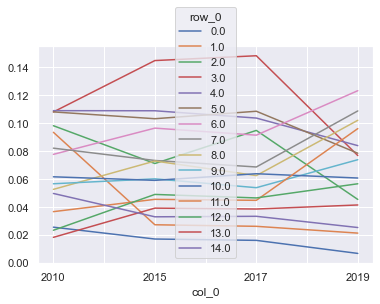

In [999]:
mask = f2f_harmonised["dataset"].isin(["2010","2015","2017","2019"])&f2f_harmonised["dataset"].notnull()

pd.crosstab(f2f_harmonised["inc_det"][mask].values,
            f2f_harmonised["dataset"][mask].values,
            values=f2f_harmonised["wt"][mask].values,aggfunc=sum,normalize='columns').T.plot(kind='line')

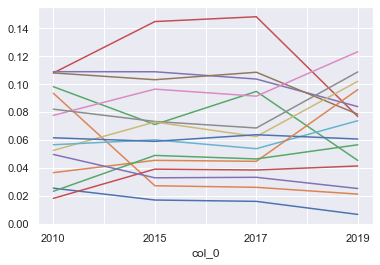

In [1003]:
mask = f2f_harmonised["dataset"].isin(["2010","2015","2017","2019"])&f2f_harmonised["dataset"].notnull()

pd.crosstab(f2f_harmonised["inc_norm"][mask].values,
            f2f_harmonised["dataset"][mask].values,
            values=f2f_harmonised["wt"][mask].values,aggfunc=sum,normalize='columns').T.plot(kind='line',legend=False)

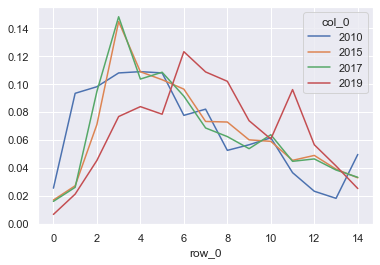

In [1018]:
pd.crosstab(f2f_harmonised["inc_det"][mask].values,
            f2f_harmonised["dataset"][mask].values,
            values=f2f_harmonised["wt"][mask].values,aggfunc=sum,normalize='columns').plot(kind='line')


In [1015]:
f2f_harmonised["inc_det"]

index
0       5.0
1       3.0
2       7.0
3       3.0
4       6.0
       ... 
2917    4.0
2918    3.0
2919    2.0
2920    7.0
2921    3.0
Name: inc_det, Length: 52731, dtype: float64

In [993]:
mask.sum()

12202

In [972]:
BES_df_list["2019"]["u05"].value_counts(dropna=False)

Conservative                                1066
Labour                                       869
Did not vote                                 516
NaN                                          501
Liberal Democrat                             270
Don't know                                   197
Scottish National Party                      126
Prefer not to say/Refuse                     122
United Kingdom Independence Party (UKIP)      82
Green Party                                   79
Not eligible/too young to vote                72
Plaid Cymru                                   17
Spoilt ballot paper                            9
Other                                          6
Brexit                                         6
British National Party (BNP)                   4
Independent                                    4
Name: u05, dtype: int64

In [964]:
mask[mask]&(BES_df_list["2019"]["u05"]=="Conservative")

0       False
1       False
2       False
3       False
4       False
        ...  
3941    False
3942     True
3943    False
3944    False
3945    False
Length: 3946, dtype: bool

In [1028]:
{k:v for k,v in BES_label_list["2010"].items() if "income" in v}

{'aq70': 'annual family income',
 'aq71': 'main source of income',
 'bq96': 'annual household income',
 'bq97': 'main source income',
 'zq96': 'annual household income(3rd)',
 'zq97': 'main source income(3rd)'}

In [1030]:
BES_label_list["2019"]

{'finalserialno': 'Final Serial Number',
 'agency': 'Fieldwork agency',
 'Y10A': 'Including yourself, how many adults aged 18 and over currently live in your hous',
 'Y10B1': 'A British Citizen',
 'Y10B2': 'A Citizen of the Republic of Ireland',
 'Y10B3': 'A Citizen of a Commonwealth country who has a ?right to remain? in the UK',
 'Y10B4': 'A Citizen of an EU country',
 'Y10B5': 'None of these',
 'a01': 'Most important issue (open text)',
 'a01_code': 'Most important issue (coded)',
 'a02': 'Best party on most important issue',
 'a03': 'Interest in politics',
 'm02_1': "Politicians don't care what people like me think",
 'm02_2': 'It is often difficult for me to understand what is going on',
 'm02_3': 'People like me have no say in what government does',
 'm02_4': 'The main political parties in Britain are pretty much all the same',
 'm02_5': 'UK parties/politicians fight eachother rather than further public interest',
 'm02_6': 'Politicians ignore the issues I really care about',
 'b

In [1029]:
BES_df_list["2010"]["zq96"].value_counts()

5001-10000      340
10001-15000     305
15001-20000     255
20001-25000     243
25001-30000     187
30001-35000     154
35001-40000     145
50001-60000     131
0-5000          116
45001-50000     110
40001-45000     106
90001 & over    106
60001-70000      96
70001-80000      59
80001-90000      42
Name: zq96, dtype: int64

In [1026]:
BES_df_list["2015"]["y01"].value_counts()

Refused                    417
Don't know                 333
GBP 10,400 - GBP 15,599    331
GBP 15,600 - GBP 20,799    231
GBP 20,800 - GBP 25,999    216
GBP 5,200 - GBP 10,399     200
GBP 26,000 - GBP 31,199    195
GBP 45,000 - GBP 49,999    128
GBP 31,200 - GBP 36,399    127
GBP 60,000 - GBP 74,999    121
GBP 36,400 - GBP 39,999    120
GBP 50,000 - GBP 59,999    118
GBP 40,000 - GBP 44,999    110
GBP 75,000 - GBP 99,999    110
GBP 2,600 - GBP 5,199       89
GBP 100,000 or more         89
Under GBP 2,600             52
Name: y01, dtype: int64

In [1024]:
BES_df_list["2017"]["y01"].value_counts()

Refused                    232
GBP 10,400 - GBP 15,599    198
Don`t know                 197
GBP 15,600 - GBP 20,799    183
GBP 20,800 - GBP 25,999    174
GBP 26,000 - GBP 31,199    162
GBP 5,200 - GBP 10,399     148
GBP 60,000 - GBP 74,999    126
GBP 31,200 - GBP 36,399    119
GBP 50,000 - GBP 59,999    109
GBP 75,000 - GBP 99,999    106
GBP 36,400 - GBP 39,999     99
GBP 45,000 - GBP 49,999     99
GBP 40,000 - GBP 44,999     79
GBP 100,000 or more         77
GBP 2,600 - GBP 5,199       54
Under GBP 2,600             32
Name: y01, dtype: int64

In [1129]:
BES_df_list["2019"]["y01_Annual"].value_counts(dropna=False).sort_index()

Not stated            147
Prefer not to say     467
Don't know            241
Under £5,200          108
£5,200 - £15,599      487
£15,600 - £25,999     603
£26,000 - £36,399     510
£36,400 - £46,799     395
£46,800 - £74,999     539
£75,000 - £149,999    349
£150,000 or more      100
Name: y01_Annual, dtype: int64

In [1019]:
BES_df_list["2019"]["Y01_detailed"].value_counts()

Not stated             501
Prefer not to say      467
£52,000 - £74,999      323
£15,600 - £20,799      264
£26,000 - £31,199      258
£10,400 - £15,599      256
£20,800 - £25,999      252
Don't know             241
£36,400 - £41,599      197
£31,200 - £36,399      195
£75,000 - £99,999      183
£5,200 - £10,399       176
£41,600 - £46,799      157
£46,800 - £51,999      157
£100,000 - £149,999    139
£150,000 or more        85
£2,600 - £5,199         65
Under £2,600            30
Name: Y01_detailed, dtype: int64

In [1020]:
BES_df_list["2019"]["Y01_detailed"]

0       £20,800 - £25,999
1       Prefer not to say
2       £31,200 - £36,399
3       £10,400 - £15,599
4       Prefer not to say
              ...        
3941    £52,000 - £74,999
3942    £20,800 - £25,999
3943    £26,000 - £31,199
3944    £41,600 - £46,799
3945    £75,000 - £99,999
Name: Y01_detailed, Length: 3946, dtype: category
Categories (18, object): ['Not stated' < 'Prefer not to say' < 'Don't know' < 'Under £2,600' ... '£52,000 - £74,999' < '£75,000 - £99,999' < '£100,000 - £149,999' < '£150,000 or more']

In [1042]:
inc_2015 = BES_df_list["2015"]["y01"]
inc_2015 = inc_2015.replace("Refused",np.nan).replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)#.value_counts()
inc_2015.value_counts(dropna=False)

NaN     750
3.0     331
4.0     231
5.0     216
2.0     200
6.0     195
10.0    128
7.0     127
12.0    121
8.0     120
11.0    118
9.0     110
13.0    110
1.0      89
14.0     89
0.0      52
dtype: int64

In [1115]:
inc_2017 = BES_df_list["2017"]["y01"]
inc_2017 = inc_2017.replace("Refused",np.nan).replace("Don`t know",np.nan).cat.codes.replace(-1,np.nan)
inc_2017#.value_counts(dropna=False)

0        2.0
1        1.0
2        2.0
3        8.0
4        9.0
        ... 
2189    12.0
2190    13.0
2191     2.0
2192     4.0
2193    10.0
Length: 2194, dtype: float64

In [1127]:
inc_2019 = BES_df_list["2019"]["Y01_detailed"]
inc_2019 = inc_2019.replace("Not stated",np.nan).replace("Prefer not to say",np.nan).replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
inc_2019.value_counts(dropna=False).sort_index()

0.0       30
1.0       65
2.0      176
3.0      256
4.0      264
5.0      252
6.0      258
7.0      195
8.0      197
9.0      157
10.0     157
11.0     323
12.0     183
13.0     139
14.0      85
NaN     1209
dtype: int64

In [1063]:
BES_df_list["2019"]["y01a"].value_counts()
# Thinking about the total income of your household from all sources before tax
# - including benefits, savings and so on, which of the following do you know best?

Your household's monthly income    586
Your household's annual income     390
Prefer not to say                  211
Don't know                          91
Your household's weekly income      72
Name: y01a, dtype: int64

In [ ]:
# it looks like they're *all* then asked three questions (annual/monthyl/weekly inc)
# can give DK/Prefer Not To Say as an option to not answer all
# or Not Stated for not answering individual ques

In [1125]:
BES_df_list["2019"]["y01_Annual"].value_counts().sort_index()

Not stated            147
Prefer not to say     467
Don't know            241
Under £5,200          108
£5,200 - £15,599      487
£15,600 - £25,999     603
£26,000 - £36,399     510
£36,400 - £46,799     395
£46,800 - £74,999     539
£75,000 - £149,999    349
£150,000 or more      100
Name: y01_Annual, dtype: int64

In [1126]:
BES_df_list["2019"]["Y01_detailed"].value_counts().sort_index()

### as the biggest category, this has screwed up imputation!
# still - you should try to repeat with raw, unimputed data

Not stated             501
Prefer not to say      467
Don't know             241
Under £2,600            30
£2,600 - £5,199         65
£5,200 - £10,399       176
£10,400 - £15,599      256
£15,600 - £20,799      264
£20,800 - £25,999      252
£26,000 - £31,199      258
£31,200 - £36,399      195
£36,400 - £41,599      197
£41,600 - £46,799      157
£46,800 - £51,999      157
£52,000 - £74,999      323
£75,000 - £99,999      183
£100,000 - £149,999    139
£150,000 or more        85
Name: Y01_detailed, dtype: int64

In [1084]:
inc_2019_annual = BES_df_list["2019"]["y01_Annual"]
inc_2019_annual = inc_2019_annual.replace("Not stated",np.nan).replace("Prefer not to say",np.nan).replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
inc_2019_annual.value_counts(dropna=False)

NaN    855
2.0    603
5.0    539
3.0    510
1.0    487
4.0    395
6.0    349
0.0    108
7.0    100
dtype: int64

In [1085]:
inc_2019_monthly = BES_df_list["2019"]["y01_Monthly"]
inc_2019_monthly = inc_2019_monthly.replace("Not stated",np.nan).replace("Prefer not to say",np.nan).replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
inc_2019_monthly.value_counts(dropna=False)

NaN    1055
2.0     559
5.0     491
1.0     489
3.0     472
4.0     361
6.0     329
0.0     101
7.0      89
dtype: int64

In [1086]:
inc_2019_weekly = BES_df_list["2019"]["y01_Weekly"]
inc_2019_weekly = inc_2019_weekly.replace("Not stated",np.nan).replace("Prefer not to say",np.nan).replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
inc_2019_weekly.value_counts(dropna=False)

NaN    1089
2.0     541
5.0     492
1.0     488
3.0     461
4.0     361
6.0     326
0.0     100
7.0      88
dtype: int64

In [1104]:
inc_2019_weekly.value_counts().sort_index()

0.0    100
1.0    488
2.0    541
3.0    461
4.0    361
5.0    492
6.0    326
7.0     88
dtype: int64

In [1082]:
pd.concat( [inc_2019,inc_2019_annual,inc_2019_monthly,inc_2019_weekly],axis=1 ).corr()

,0,1,2,3
0,1.000000,0.990781,0.990781,0.990781
1,0.990781,1.000000,0.996938,0.994767
2,0.990781,0.996938,1.000000,0.997189
3,0.990781,0.994767,0.997189,1.000000


In [1114]:
inc_2017

0        GBP 5,200 - GBP 10,399
1         GBP 2,600 - GBP 5,199
2        GBP 5,200 - GBP 10,399
3       GBP 36,400 - GBP 39,999
4       GBP 40,000 - GBP 44,999
                 ...           
2189    GBP 60,000 - GBP 74,999
2190    GBP 75,000 - GBP 99,999
2191     GBP 5,200 - GBP 10,399
2192    GBP 15,600 - GBP 20,799
2193    GBP 45,000 - GBP 49,999
Name: y01, Length: 2194, dtype: category
Categories (15, object): ['Under GBP 2,600' < 'GBP 2,600 - GBP 5,199' < 'GBP 5,200 - GBP 10,399' < 'GBP 10,400 - GBP 15,599' ... 'GBP 50,000 - GBP 59,999' < 'GBP 60,000 - GBP 74,999' < 'GBP 75,000 - GBP 99,999' < 'GBP 100,000 or more']

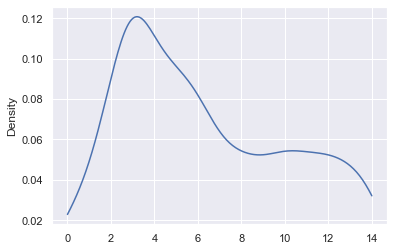

In [1117]:
sns.kdeplot(inc_2015,cut=0)

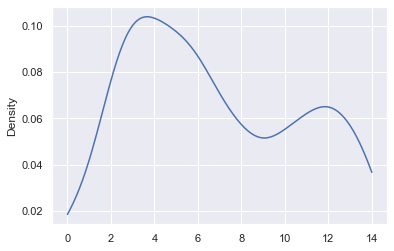

In [1116]:
sns.kdeplot(inc_2017,cut=0)

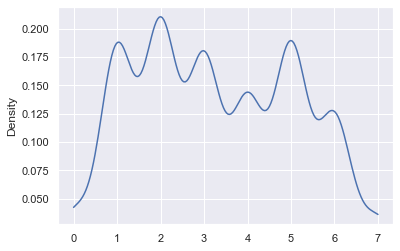

In [1101]:
sns.kdeplot(inc_2019_weekly,cut=0)

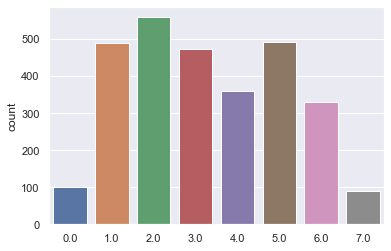

In [1111]:
sns.countplot(inc_2019_monthly)

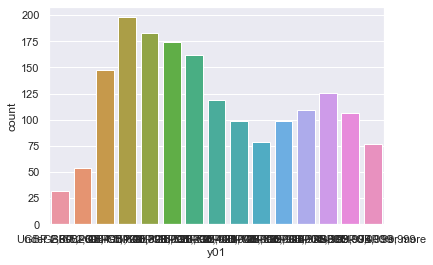

In [1112]:
sns.countplot(inc_2017)

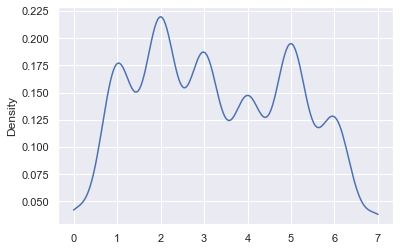

In [1098]:
sns.kdeplot(inc_2019_annual,cut=0)

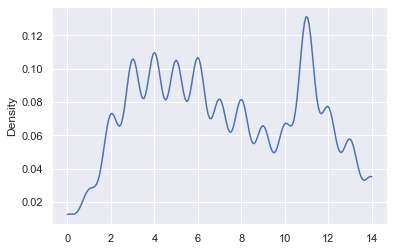

In [1108]:
sns.kdeplot(inc_2019,cut=0,bw=.1)

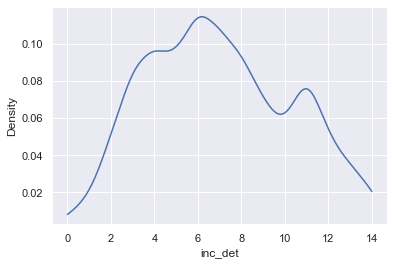

In [1092]:
sns.kdeplot(f2f_harmonised[f2f_harmonised["dataset"]=="2019"]["inc_det"],cut=0)

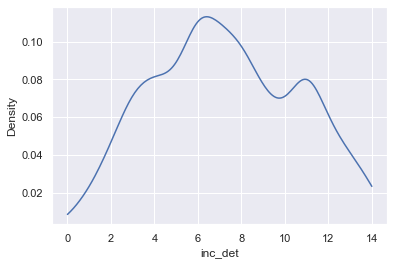

In [1122]:
sns.kdeplot(f2f_harmonised[f2f_harmonised["dataset"]=="2019"]["inc_det"],cut=0,weights= f2f_harmonised[f2f_harmonised["dataset"]=="2019"]["wt"] )

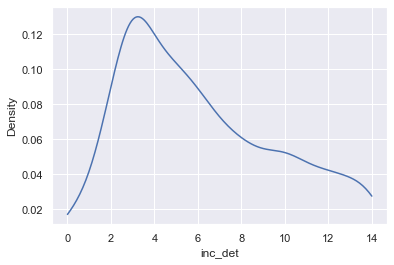

In [1093]:
sns.kdeplot(f2f_harmonised[f2f_harmonised["dataset"]=="2017"]["inc_det"],cut=0)

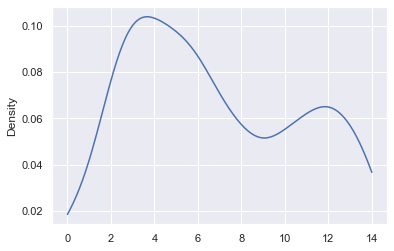

In [1118]:
sns.kdeplot(inc_2017,cut=0)

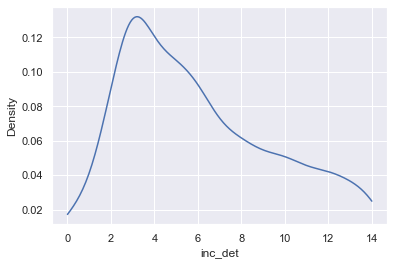

In [1094]:
sns.kdeplot(f2f_harmonised[f2f_harmonised["dataset"]=="2015"]["inc_det"],cut=0)

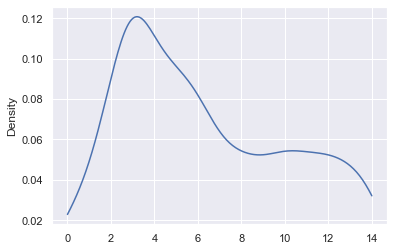

In [1121]:
sns.kdeplot(inc_2015,cut=0)

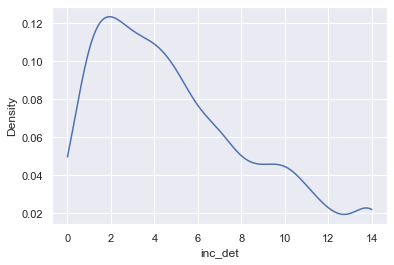

In [1095]:
sns.kdeplot(f2f_harmonised[f2f_harmonised["dataset"]=="2010"]["inc_det"],cut=0)

In [1068]:
BES_df_list["2019"]["y01_Annual"].value_counts(dropna=False)

£15,600 - £25,999     603
£46,800 - £74,999     539
£26,000 - £36,399     510
£5,200 - £15,599      487
Prefer not to say     467
£36,400 - £46,799     395
£75,000 - £149,999    349
Don't know            241
Not stated            147
Under £5,200          108
£150,000 or more      100
Name: y01_Annual, dtype: int64

In [1070]:
BES_df_list["2019"]["y01_Monthly"].value_counts(dropna=False)

£1,300 - £2,166      559
£3,900 - £6,249      491
£435 - £1,299        489
£2,167 - £3,032      472
Prefer not to say    467
£3,033 - £3,899      361
Not stated           347
£6,250 - £12,499     329
Don't know           241
Under £435           101
£12,500 or more       89
Name: y01_Monthly, dtype: int64

In [1071]:
BES_df_list["2019"]["y01_Weekly"].value_counts(dropna=False)

£300 - £499          541
£900 - £1,439        492
£100 - £299          488
Prefer not to say    467
£500 - £699          461
Not stated           381
£700 - £899          361
£1,440 - £2,899      326
Don't know           241
Under £100           100
£2,900 or more        88
Name: y01_Weekly, dtype: int64

In [1064]:
BES_df_list["2019"]["Y01_detailed"].value_counts()

Not stated             501
Prefer not to say      467
£52,000 - £74,999      323
£15,600 - £20,799      264
£26,000 - £31,199      258
£10,400 - £15,599      256
£20,800 - £25,999      252
Don't know             241
£36,400 - £41,599      197
£31,200 - £36,399      195
£75,000 - £99,999      183
£5,200 - £10,399       176
£41,600 - £46,799      157
£46,800 - £51,999      157
£100,000 - £149,999    139
£150,000 or more        85
£2,600 - £5,199         65
Under £2,600            30
Name: Y01_detailed, dtype: int64

In [1057]:
BES_df_list["2019"]["Y01_detailed"].cat.categories

Index(['Not stated', 'Prefer not to say', 'Don't know', 'Under £2,600',
       '£2,600 - £5,199', '£5,200 - £10,399', '£10,400 - £15,599',
       '£15,600 - £20,799', '£20,800 - £25,999', '£26,000 - £31,199',
       '£31,200 - £36,399', '£36,400 - £41,599', '£41,600 - £46,799',
       '£46,800 - £51,999', '£52,000 - £74,999', '£75,000 - £99,999',
       '£100,000 - £149,999', '£150,000 or more'],
      dtype='object')

In [1058]:
BES_df_list["2017"]["y01"].cat.categories

Index(['Refused', 'Don`t know', 'Under GBP 2,600', 'GBP 2,600 - GBP 5,199',
       'GBP 5,200 - GBP 10,399', 'GBP 10,400 - GBP 15,599',
       'GBP 15,600 - GBP 20,799', 'GBP 20,800 - GBP 25,999',
       'GBP 26,000 - GBP 31,199', 'GBP 31,200 - GBP 36,399',
       'GBP 36,400 - GBP 39,999', 'GBP 40,000 - GBP 44,999',
       'GBP 45,000 - GBP 49,999', 'GBP 50,000 - GBP 59,999',
       'GBP 60,000 - GBP 74,999', 'GBP 75,000 - GBP 99,999',
       'GBP 100,000 or more'],
      dtype='object')

In [1059]:
BES_df_list["2015"]["y01"].cat.categories

Index(['Refused', 'Don't know', 'Under GBP 2,600', 'GBP 2,600 - GBP 5,199',
       'GBP 5,200 - GBP 10,399', 'GBP 10,400 - GBP 15,599',
       'GBP 15,600 - GBP 20,799', 'GBP 20,800 - GBP 25,999',
       'GBP 26,000 - GBP 31,199', 'GBP 31,200 - GBP 36,399',
       'GBP 36,400 - GBP 39,999', 'GBP 40,000 - GBP 44,999',
       'GBP 45,000 - GBP 49,999', 'GBP 50,000 - GBP 59,999',
       'GBP 60,000 - GBP 74,999', 'GBP 75,000 - GBP 99,999',
       'GBP 100,000 or more'],
      dtype='object')

In [319]:
f2f_harmonised["vote_complete_simple"].value_counts(dropna=False)

CON      17150
LAB      16387
DNV       9997
LD        6381
SNP       1147
DK         599
REFUK      525
GP         281
PC         264
Name: vote_complete_simple, dtype: int64

In [544]:
f2f_harmonised["age_left_education_3"].value_counts(dropna=False)

15 or younger    26250
16               10028
19 or older       8148
18                7738
NaN                567
Name: age_left_education_3, dtype: int64